# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.8 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [33]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need
import PIL
from torchvision.transforms import v2
from pytorch_lightning.tuner import Tuner
from torchvision.models import ResNet18_Weights
from torchvision.models import ConvNeXt_Small_Weights

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-11 18:30:05--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-11 18:30:05--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f89ce1b90b5acb83f4ebefea9.dl.dropboxusercontent.com/cd/0/get/CHUGhoARGxC43PH2RbvXeliYLyLmy8zrr7fWDS9EUy45gPDA2FZNXqHONyNqqA1hvD8J3XNrAH-CTTZ74LgeXNh2LHDkhEMg7IK2KcBP-hp4NAMFZUNZymHJmUpRKB-bzLIvm6ZgkCiptbNCIqbJYtZG/file?dl=1# [following]
--2023-11-11 18:30:06--  https://uc1f89ce1b90b5acb83f4ebefea9.dl.dropboxusercontent.com/cd/0/get/CHUGhoARGxC43PH2RbvXeliYLyLmy8zrr7fWDS9EUy45gPDA2FZNXqHONyNqqA1hvD8J3XNrAH-CTTZ74LgeXNh2LHDkhEMg7IK2K

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

Аугментацию взял по аналогиии с [данной](https://pytorch.org/vision/main/transforms.html#transforming-and-augmenting-images)

In [42]:
train_transform = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
val_transform = v2.Compose([
        transforms.ToTensor(),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

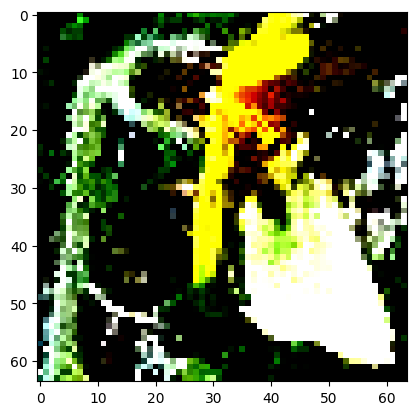

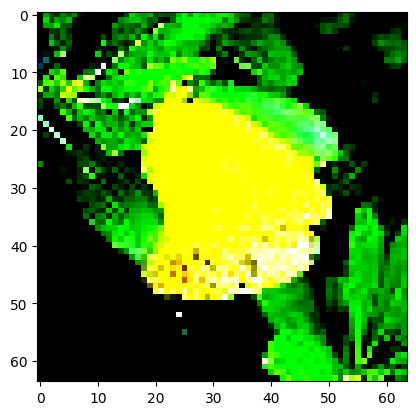

In [8]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [17]:
class YourNet(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [23]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super().__init__()
        self.model = model
        self.lr = lr

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=(self.lr or self.learning_rate))
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

### Валидация результатов задания

In [28]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    #for images, labels in tqdm(test_dataloader):
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

### Эксперименты

#### Эксперимент 1

Дефолтный эксперимент для начала: моделька - resnet18, batch_size = 64, lr = 0.01, optimizer = Adam, никаких наворотов нет, гоняем на одной эпохе. \\
val_los = 4.33 \\
accuracy = 0.0837

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
module = YourModule(model, lr=0.01)

trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


#### Эксперимент 2

Тут я перебирал разные scheduler'ы из семинара 4 и из разных статей. В итоге остановился на этом scheduler'е как на лучшем: \\
P.S. никакого другого кода не приводил, т.к. ничего особо интересного не было

In [10]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super().__init__()
        self.model = model
        self.lr = lr

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=(self.lr or self.learning_rate))
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

#### Эксперимент 3

Займеся подбором initial lr. \\
Мною было замечено, что initial lr = 0.01 неээфективен и его надо бы уменьшить как минимум на порядок, так что я решил повнимательнее рассмотреть initial lr где-то около 1e-03:

In [ ]:
accuracies = []
lrs = [5e-04, 8e-04, 10e-04, 15e-04, 20e-04]
for lr in lrs:
    print(f'---------------------\nlr = {lr}')
    device = "cuda" if torch.cuda.is_available() else "cpu"

    seed_everything(123456)
    model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
    module = YourModule(model, lr=lr)

    trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
    trainer.fit(module, train_dataloader, val_dataloader)

    accuracies.append(evaluate_task(model, val_dataloader))

---------------------
lr = 0.0005


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


---------------------
lr = 0.0008


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


---------------------
lr = 0.001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


---------------------
lr = 0.0015


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


---------------------
lr = 0.002


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


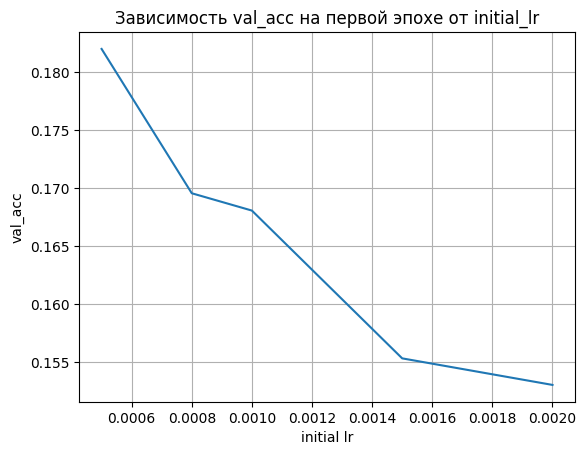

In [ ]:
plt.grid(True)
plt.ylabel('val_acc')
plt.xlabel('initial lr')
plt.title('Зависимость val_acc на первой эпохе от initial_lr')
plt.plot(lrs, accuracies)

plt.show()

Видим, что val_acc тем выше, чем меньше initial lr $\Rightarrow$ попробуем его еще уменьшить

In [ ]:
accuracies_1 = []
lrs_1 = [5e-05, 1e-04, 3e-04]
for lr in lrs_1:
    print(f'---------------------\nlr = {lr}')
    device = "cuda" if torch.cuda.is_available() else "cpu"

    seed_everything(123456)
    model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
    module = YourModule(model, lr=lr)

    trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
    trainer.fit(module, train_dataloader, val_dataloader)

    accuracies_1.append(evaluate_task(model, val_dataloader))

---------------------
lr = 5e-05


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


---------------------
lr = 0.0001


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


---------------------
lr = 0.0003


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


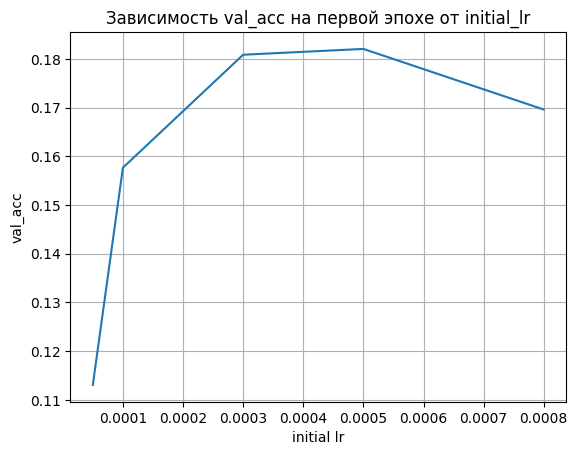

In [ ]:
lrs_1 = lrs_1 + [5e-04, 8e-04]
accuracies_1 = accuracies_1 + [accuracies[0], accuracies[1]]

plt.grid(True)
plt.ylabel('val_acc')
plt.xlabel('initial lr')
plt.title('Зависимость val_acc на первой эпохе от initial_lr')
plt.plot(lrs_1, accuracies_1)

plt.show()

Исходя из увиденного, попросим lr_find найти нам лучший initial lr между 4e-04 и 6e-04

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
module = YourModule(model, lr=3e-04)

trainer = pl.Trainer(accelerator="gpu", max_epochs=1)

tuner = Tuner(trainer)
tuner.lr_find(module, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, min_lr=4e-04, max_lr=6e-04, num_training=1000)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve perfor

Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00042958791248923466
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_d313b889-6e40-4abb-8533-a29e4f718be6.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_d313b889-6e40-4abb-8533-a29e4f718be6.ckpt


#### Эксперимент 4

Загоним это все под много эпох:

In [ ]:
wandb_logger = WandbLogger(log_model='all', project='hw_2', name='1.4')
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=20)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * accuracy_val / 0.44, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: ednovosiltsev (nov_team). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.



accuracy = 0.384
Оценка за это задание составит 8.72 баллов


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_loss,█▇▅▅▄▄▅▄▃▄▃▃▂▃▁▂▁▂▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▃▂▂▂▂▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
val_acc,▁▄▆▇▇███████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,19
train_loss,1.2385
trainer/global_step,31259
val_acc,0.38368
val_loss,2.66597


По графику видим, что лучшее accuracy в итоге на 10 эпохах - 0.3864

In [25]:
print(f"Оценка за это задание составит {np.clip(10 * 0.3864 / 0.44, 0, 10):.2f} баллов")

Оценка за это задание составит 8.78 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Валидация результатов задания

Такой же костыль для модели как в 1м номере (вогнать импортную модель в YourNet) у меня не получился (были ошибки при обучении), поэтому я решил напрямую имортить модель, так что пришлось чуть переписать функцию evaluate_task

In [39]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    acc = 0.0
    #for images, labels in tqdm(test_dataloader):
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images)
            acc_batch = accuracy(torch.argmax(preds, dim=-1).long(), labels.long(), task = 'multiclass', num_classes=200)
        acc += acc_batch
    acc = acc / len(test_dataloader)
    return acc.cpu()

### Тренировочный класс lightning

Я подглядел в [этом](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py) файле, как выглядит forward у resnet'a и просто взял его себе, прогнав необучаемую часть под with torch.no_grad()  

In [40]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.lr = lr
        self.optimizer = torch.optim.Adam(self.model.fc.parameters(), lr=(self.lr or self.learning_rate)) # учим только последний слой
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.conv1(x)
            x = self.model.bn1(x)
            x = self.model.relu(x)
            x = self.model.maxpool(x)
            x = self.model.layer1(x)
            x = self.model.layer2(x)
            x = self.model.layer3(x)
            x = self.model.layer4(x)
            x = self.model.avgpool(x)
            features = torch.flatten(x, 1)

        preds = self.model.fc(features)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

### Эксперименты

#### Эксперимент 1

Хотелось просто взять все наработки из 1го задания и добавить предобученную модель. Вышло так себе(

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = torchvision.models.resnet18( weights=ResNet18_Weights.IMAGENET1K_V1 ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.



accuracy = 0.327
Оценка за это задание составит 0.00 баллов


#### Эксперимент 2

Попробуем не только последний слой обучать

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.lr = lr
        self.optimizer = torch.optim.Adam([
                {'params': model.layer4.parameters()},
                {'params': model.fc.parameters()}
            ], lr=(self.lr or self.learning_rate))
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.conv1(x)
            x = self.model.bn1(x)
            x = self.model.relu(x)
            x = self.model.maxpool(x)
            x = self.model.layer1(x)
            x = self.model.layer2(x)
            features = self.model.layer3(x)

        features = self.model.layer4(features)
        features = self.model.avgpool(features)
        features = torch.flatten(features, 1)
        preds = self.model.fc(features)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

In [ ]:
#wandb_logger = WandbLogger(log_model='all', project='hw_2', name='2.2')
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = torchvision.models.resnet18( weights=ResNet18_Weights.IMAGENET1K_V1 ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

#trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=10)
trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.



accuracy = 0.438
Оценка за это задание составит 0.00 баллов


Может обнаглеть и обучать еще и layer3?

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.lr = lr
        self.optimizer = torch.optim.Adam([
                {'params': model.layer3.parameters()},
                {'params': model.layer4.parameters()},
                {'params': model.fc.parameters()}
            ], lr=(self.lr or self.learning_rate))
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.conv1(x)
            x = self.model.bn1(x)
            x = self.model.relu(x)
            x = self.model.maxpool(x)
            x = self.model.layer1(x)
            features = self.model.layer2(x)

        features = self.model.layer3(features)
        features = self.model.layer4(features)
        features = self.model.avgpool(features)
        features = torch.flatten(features, 1)
        preds = self.model.fc(features)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = torchvision.models.resnet18( weights=ResNet18_Weights.IMAGENET1K_V1 ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.



accuracy = 0.447
Оценка за это задание составит 0.00 баллов


Грех не попробовать и еще один слой обучать

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.lr = lr
        self.optimizer = torch.optim.Adam([
                {'params': model.layer2.parameters()},
                {'params': model.layer3.parameters()},
                {'params': model.layer4.parameters()},
                {'params': model.fc.parameters()}
            ], lr=(self.lr or self.learning_rate))
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.conv1(x)
            x = self.model.bn1(x)
            x = self.model.relu(x)
            x = self.model.maxpool(x)
            features = self.model.layer1(x)

        features = self.model.layer2(features)
        features = self.model.layer3(features)
        features = self.model.layer4(features)
        features = self.model.avgpool(features)
        features = torch.flatten(features, 1)
        preds = self.model.fc(features)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = torchvision.models.resnet18( weights=ResNet18_Weights.IMAGENET1K_V1 ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(accelerator="gpu", max_epochs=1)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.



accuracy = 0.427
Оценка за это задание составит 0.00 баллов


Остановимся на дообучении layer3, layer4 и fc

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.lr = lr
        self.optimizer = torch.optim.Adam([
                {'params': model.layer3.parameters()},
                {'params': model.layer4.parameters()},
                {'params': model.fc.parameters()}
            ], lr=(self.lr or self.learning_rate))
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.conv1(x)
            x = self.model.bn1(x)
            x = self.model.relu(x)
            x = self.model.maxpool(x)
            x = self.model.layer1(x)
            features = self.model.layer2(x)

        features = self.model.layer3(features)
        features = self.model.layer4(features)
        features = self.model.avgpool(features)
        features = torch.flatten(features, 1)
        preds = self.model.fc(features)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

#### Эксперимент 3                

Покопавшись с resnet18 еще некоторое время я понял, что она у меня упируется в потолок с val_acc где-то в районе 0.63, поэтому решено было использовать другую модель. \\
Я искал [здесь](https://pytorch.org/vision/main/models.html#table-of-all-available-classification-weights) модели с топовыми показателями на ImageNet'е и более-менее адекатным количеством параметров. Первой под это подходила ConvNeXt_Small   

Такую вот аугментацию нашел [здесь](https://pytorch.org/vision/stable/models.html#using-the-pre-trained-models)

In [35]:
train_transform = ConvNeXt_Small_Weights.IMAGENET1K_V1.transforms()
val_transform =  ConvNeXt_Small_Weights.IMAGENET1K_V1.transforms()

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Логика такая же, как и для резнета. Нужный форвард взял [здесь](https://github.com/pytorch/vision/blob/main/torchvision/models/convnext.py)

In [36]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr) -> None:
        super().__init__()
        self.model = model
        self.model.classifier[2] = nn.Linear(in_features=768, out_features=1000, bias=True)

        self.lr = lr
        self.optimizer = torch.optim.Adam([
                {'params': model.classifier[2].parameters()}
            ], lr=(self.lr or self.learning_rate))
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.features(x)
            x = self.model.avgpool(x)
        preds = self.model.classifier(x)

        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

Опытным путем выяснил, что нужно ровно 3 эпохи

In [37]:
wandb_logger = WandbLogger(log_model='all', project='hw_2', name='2.3')
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = torchvision.models.convnext_small( weights=ConvNeXt_Small_Weights.IMAGENET1K_V1 ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=3)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb.finish()

Downloading: "https://download.pytorch.org/models/convnext_small-0c510722.pth" to /root/.cache/torch/hub/checkpoints/convnext_small-0c510722.pth

  0%|          | 0.00/192M [00:00<?, ?B/s]
  0%|          | 472k/192M [00:00<00:41, 4.81MB/s]
  1%|          | 1.87M/192M [00:00<00:18, 10.6MB/s]
  4%|▎         | 6.79M/192M [00:00<00:06, 29.3MB/s]
  8%|▊         | 15.6M/192M [00:00<00:03, 53.1MB/s]
 11%|█         | 20.7M/192M [00:00<00:03, 52.0MB/s]
 13%|█▎        | 25.6M/192M [00:00<00:03, 45.7MB/s]
 16%|█▌        | 30.1M/192M [00:00<00:04, 42.0MB/s]
 18%|█▊        | 34.8M/192M [00:00<00:03, 42.2MB/s]
 20%|██        | 38.9M/192M [00:01<00:04, 38.3MB/s]
 22%|██▏       | 42.7M/192M [00:01<00:04, 34.3MB/s]
 24%|██▍       | 46.0M/192M [00:01<00:04, 33.3MB/s]
 26%|██▌       | 50.2M/192M [00:01<00:04, 36.0MB/s]
 28%|██▊       | 53.7M/192M [00:01<00:04, 35.0MB/s]
 30%|██▉       | 57.1M/192M [00:01<00:04, 33.8MB/s]
 32%|███▏      | 61.4M/192M [00:01<00:03, 36.5MB/s]
 35%|███▍      | 66.8M/192M [00:

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ConvNeXt         | 50.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
50.2 M    Trainable params
0         Non-trainable params
50.2 M    Total params
200.895   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.



accuracy = 0.843
Оценка за это задание составит 10.00 баллов


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅█████████████
train_loss,█▅▃▂▂▂▂▂▂▂▁▁▂▁▂▁▂▂▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_acc,▁▇█
val_loss,█▃▁
epoch,2
train_loss,0.53142
trainer/global_step,4688
val_acc,0.84275
val_loss,0.58865


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспрериментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

## Задание 1

Все более-менее удачно проведенные эксперименты описаны в разделе 'Задание 1.'

Мой SotA (см. 4й эксперимент):

In [29]:
class YourNet(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [30]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super().__init__()
        self.model = model
        self.lr = lr

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=(self.lr or self.learning_rate))
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.65 ** epoch)
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)
    def on_validation_epoch_end(self):
        accuracy_val = evaluate_task(model, val_dataloader)
        self.log("val_acc", accuracy_val, prog_bar=True)

In [31]:
wandb_logger = WandbLogger(log_model='all', project='hw_2', name='1_SotA')
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = YourNet( torchvision.models.resnet18(num_classes=200) ).to(device)
module = YourModule(model, lr=0.00042958791248923466)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=10)
trainer.fit(module, train_dataloader, val_dataloader)

accuracy_val = evaluate_task(model, val_dataloader)
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * accuracy_val / 0.44, 0, 10):.2f} баллов")

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.



accuracy = 0.387
Оценка за это задание составит 8.79 баллов


epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,██▇▇▅▅▅▄▄▃▄▄▄▃▃▂▃▂▄▃▃▂▂▂▁▂▂▂▁▁▂▂▁▁▂▁▂▂▃▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
val_acc,▁▄▆▇▇█████
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,9
train_loss,1.55956
trainer/global_step,15629
val_acc,0.38643
val_loss,2.64924


## Задание 2

Все более-менее удачно проведенные эксперименты описаны в разделе 'Задание 2.' \\
Весь SotA лежит в 3м эксперименте. На всякий случай дублирую [ссылку](https://wandb.ai/nov_team/hw_2/runs/b4ph3zka) на соответсвующий run в wandb. Вот accuracy и оценка:

In [38]:
accuracy_val = 0.843
print(f'\naccuracy = {accuracy_val:.3f}')
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_val - 0.5) / 0.34, 0, 10):.2f} баллов")


accuracy = 0.843
Оценка за это задание составит 10.00 баллов
